## https://www.kaggle.com/mchirico/montcoalert

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('911.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


# Top 5 zipcodes

In [6]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

# Top 5 townships

In [7]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

# Number of Unique title codes

In [8]:
df['title'].nunique()

110

** Create a new column split off from the title column with the specific reason for a call **

In [9]:
df['Reason'] = (df['title'].apply(lambda x: (x.split(':',1)[0])))

** Most common Reason for a 911 call based off of this new column **

In [10]:
df['Reason'].value_counts().head()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

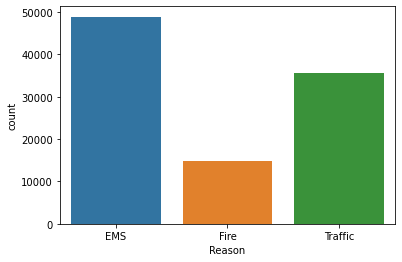

In [11]:
sns.countplot(x = 'Reason',data = df)

** Converting the column from strings to DateTime objects. **

In [12]:
df['timeStamp'] = (df['timeStamp'].apply(pd.to_datetime))

# Created 3 new columns based on the timestamp column

In [13]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)

** Map day of the week to a number using a dictionary and dmap **

In [14]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [15]:
df['Day of Week'] = df['Day of Week'].map(dmap)

Text(0.5, 1.0, '911 calls by Day of the Week by Reason')

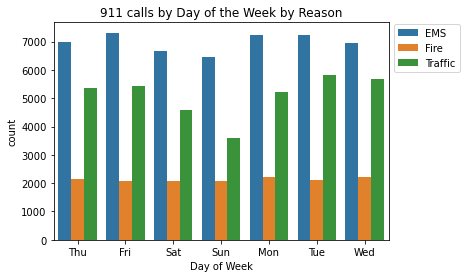

In [16]:
sns.countplot(x = 'Day of Week',hue = 'Reason',data = df)
plt.legend(loc = 'center left',bbox_to_anchor=(1,0.88))
plt.title('911 calls by Day of the Week by Reason')

Text(0.5, 1.0, '911 calls by Month by Reason')

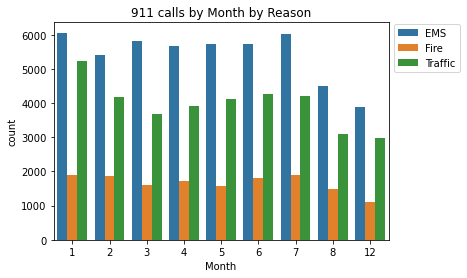

In [17]:
sns.countplot(x = 'Month',hue = 'Reason',data = df)
plt.legend(loc = 'center left',bbox_to_anchor=(1,0.88))
plt.title('911 calls by Month by Reason')

** Since some months are missing from the data, plot a linear plot which fills in those months. **

In [18]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


<AxesSubplot:xlabel='Month'>

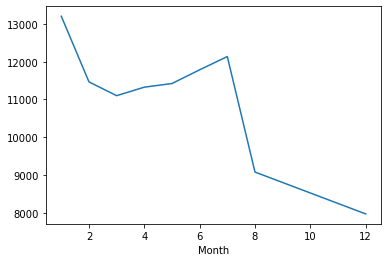

In [19]:
byMonth['lat'].plot()

** Linear fit on the number of calls per month. **

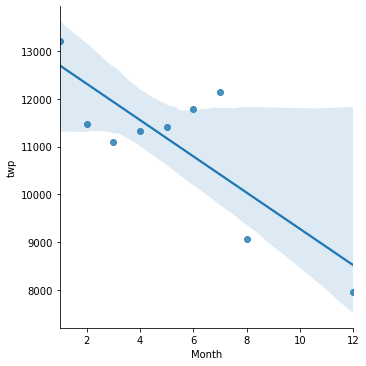

In [20]:
sns.lmplot(x='Month',y='twp',data = (byMonth.reset_index()))

**'Date' that contains the date from the timeStamp column.** 

In [21]:
df['Date'] = (df['timeStamp'].apply(lambda x: x.date()))

** Create a plot of counts of 911 calls.**

<AxesSubplot:xlabel='Date'>

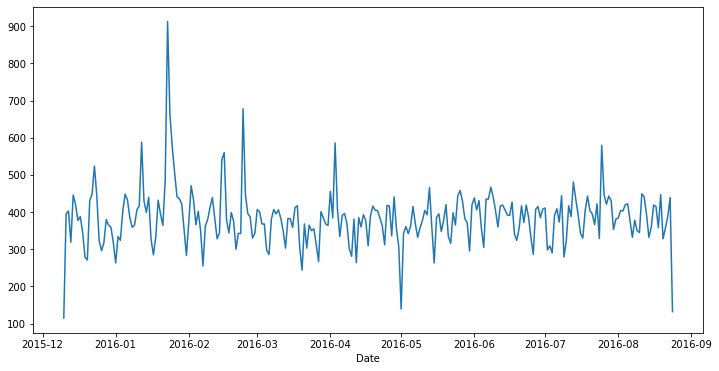

In [22]:
plt.figure(figsize= (12,6))
df.groupby('Date').count()['twp'].plot()

** Three separate plots with one for each reason for the call**

<AxesSubplot:title={'center':'Traffic'}, xlabel='Date'>

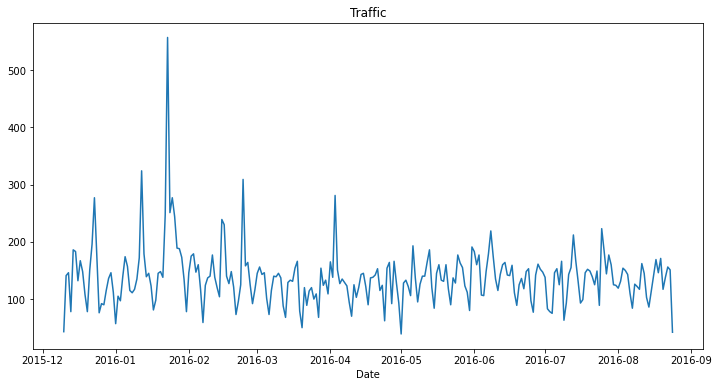

In [32]:
plt.figure(figsize= (12,6))
df[df['Reason'] == 'Traffic'].groupby('Date').count()['twp'].plot(title = 'Traffic')

<AxesSubplot:title={'center':'Fire'}, xlabel='Date'>

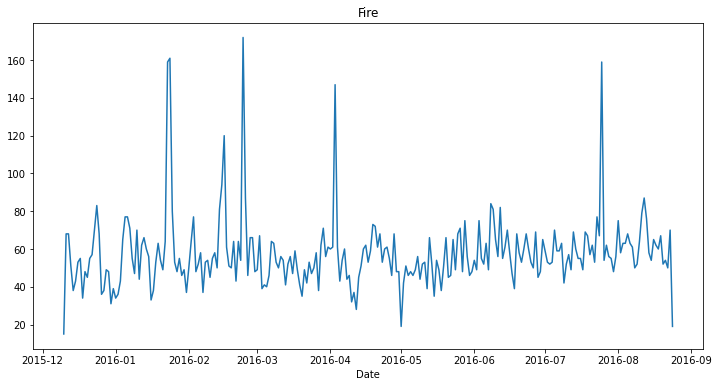

In [33]:
plt.figure(figsize= (12,6))
df[df['Reason'] == 'Fire'].groupby('Date').count()['twp'].plot(title = 'Fire')

<AxesSubplot:title={'center':'EMS'}, xlabel='Date'>

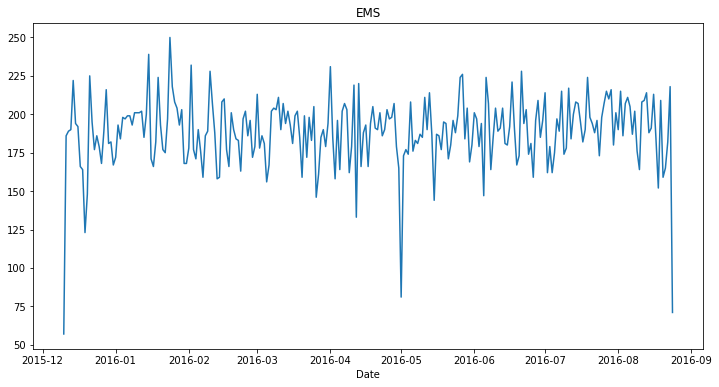

In [34]:
plt.figure(figsize= (12,6))
df[df['Reason'] == 'EMS'].groupby('Date').count()['twp'].plot(title = 'EMS')

____
** Restructure the dataframe so that the columns become Hours and Index becomes day of the week. **

In [35]:
dfWH = df.groupby(['Day of Week','Hour']).count()['twp'].unstack()
dfWH.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,931,980,1039,980,819,696,667,558,514,474
Mon,282,220,201,194,204,267,397,653,819,785,...,869,913,988,997,885,746,612,496,471,325
Sat,373,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,627,571,505,467
Sun,383,304,285,268,242,240,300,401,483,620,...,684,691,663,714,670,654,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1011,810,698,617,553,424,354


** Create a HeatMap and Clustermap using this dataframe. **

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

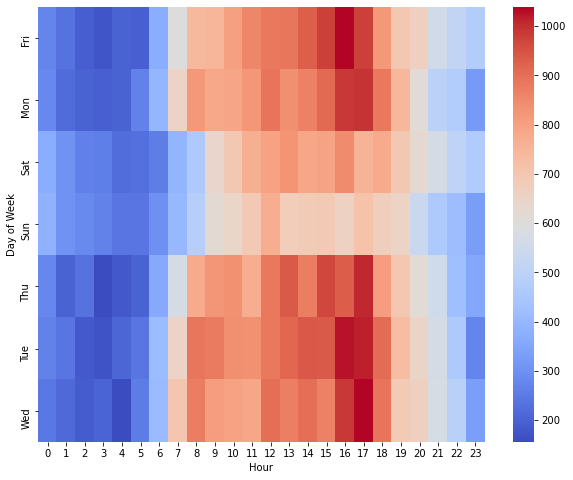

In [38]:
plt.figure(figsize= (10,8))
sns.heatmap(dfWH,cmap = 'coolwarm')

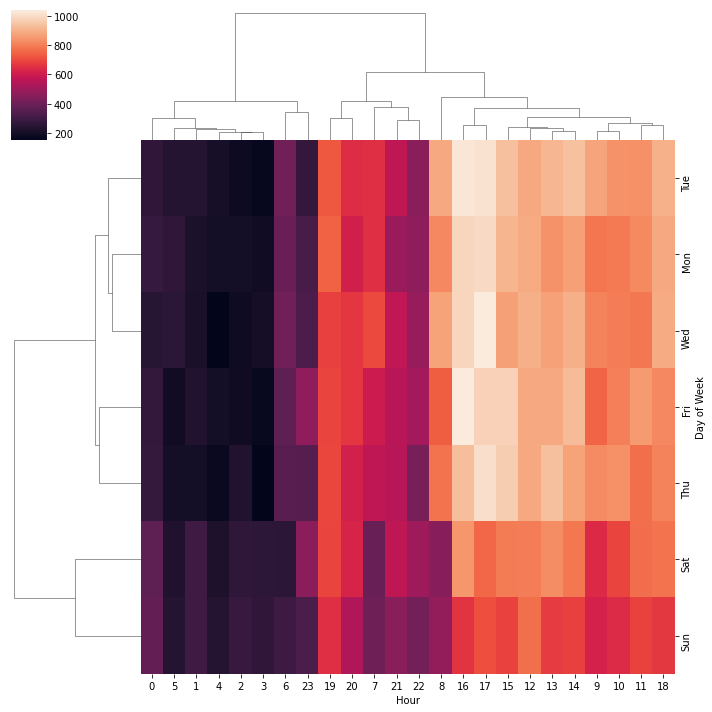

In [28]:
sns.clustermap(dfWH)

** Repeat these plots for a DataFrame that shows the Month as the column. **

In [39]:
dfWM = df.groupby(['Day of Week','Month']).count()['twp'].unstack()
dfWM.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1523,1958,1730,1649,2045,1310,1064
Mon,1727,1964,1533,1597,1779,1617,1692,1509,1256
Sat,2290,1440,1264,1732,1444,1388,1695,1099,978
Sun,1960,1229,1100,1488,1422,1331,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1227,1265


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

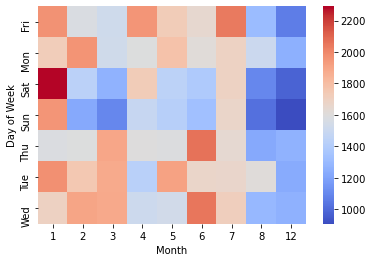

In [40]:
sns.heatmap(dfWM,cmap = 'coolwarm')

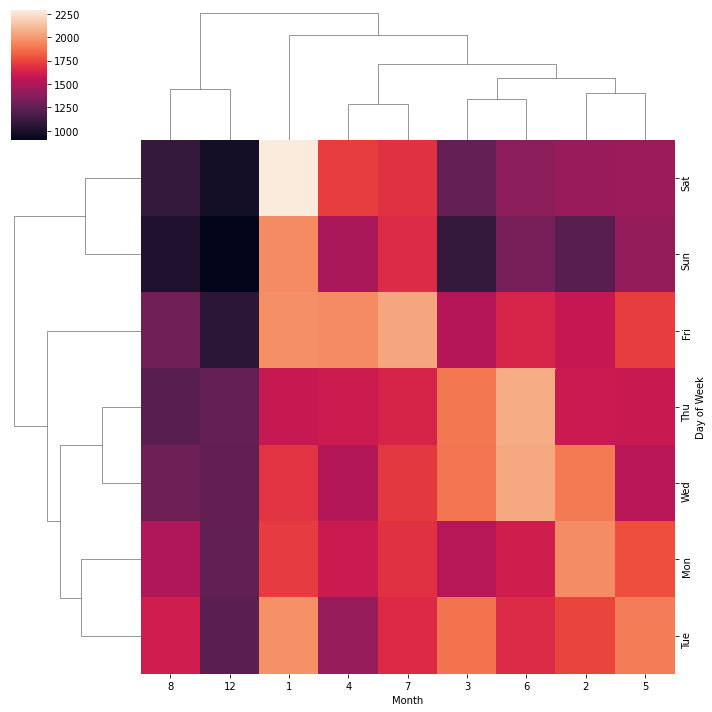

In [41]:
sns.clustermap(dfWM)